λ	Loss_A		Loss_B
-5.00	301.34		311.28
-4.97	299.87		309.83
-4.95	298.40		308.37
-4.92	296.94		306.92
-4.90	295.47		305.47
-4.87	294.00		304.02
-4.85	292.54		302.58
-4.82	291.07		301.13
-4.80	289.61		299.69
-4.77	288.15		298.24
-4.75	286.69		296.80
-4.72	285.23		295.36
-4.70	283.77		293.93
-4.67	282.31		292.49
-4.65	280.85		291.05
-4.62	279.40		289.62
-4.60	277.94		288.19
-4.57	276.49		286.76
-4.55	275.04		285.33
-4.52	273.59		283.91
-4.50	272.14		282.48
-4.47	270.69		281.06
-4.45	269.24		279.64
-4.42	267.80		278.22
-4.40	266.35		276.80
-4.37	264.91		275.39
-4.35	263.47		273.98
-4.32	262.03		272.57
-4.30	260.59		271.16
-4.27	259.16		269.76
-4.25	257.73		268.35
-4.22	256.29		266.95
-4.20	254.86		265.56
-4.17	253.43		264.16
-4.15	252.01		262.77
-4.12	250.58		261.38
-4.10	249.16		259.99
-4.07	247.74		258.61
-4.05	246.32		257.23
-4.02	244.90		255.85
-4.00	243.49		254.47
-3.97	242.08		253.10
-3.95	240.67		251.73
-3.92	239.26		250.37
-3.90	237.85		249.00
-3.87	236.45		247.64
-3.85	235.05		246

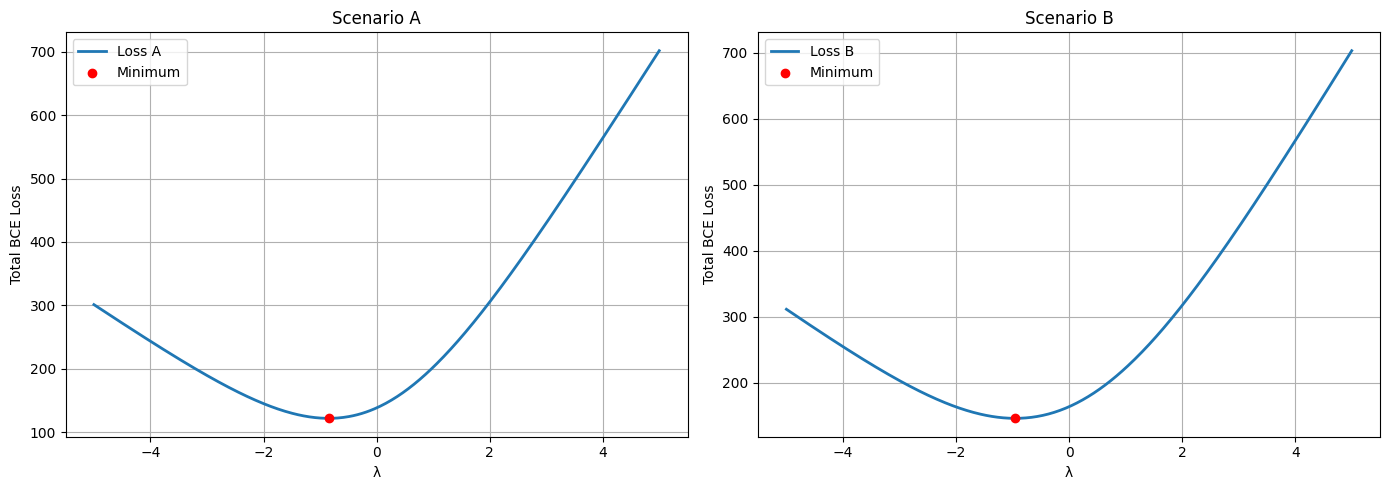

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = 200       # number of samples
m = 60             # number of ones
k = n - m              # number of zeros
y = np.array([1]*m + [0]*k)
# predictions from a normal distribution
np.random.seed(42)
f = np.random.randn(n)

# helper functions
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def bce_loss(y_true, z):
    p = sigmoid(z)
    return - (y_true * np.log(p) + (1 - y_true) * np.log(1 - p))
lambdas = np.linspace(-5, 5, 400)

# total loss for each lambda
loss_A = np.array([np.sum(bce_loss(y, lam))       for lam in lambdas])
loss_B = np.array([np.sum(bce_loss(y, f + lam))   for lam in lambdas])

print("λ\tLoss_A\t\tLoss_B")
for lam, la, lb in zip(lambdas, loss_A, loss_B):
    print(f"{lam:.2f}\t{la:.2f}\t\t{lb:.2f}")

# lambda that gives the lowest loss
idx_A = np.argmin(loss_A)
idx_B = np.argmin(loss_B)

print(f"Scenario A: min loss = {loss_A[idx_A]:.4f} at λ = {lambdas[idx_A]:.4f}")
print(f"Scenario B: min loss = {loss_B[idx_B]:.4f} at λ = {lambdas[idx_B]:.4f}")

# plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scenario A
axes[0].plot(lambdas, loss_A, linewidth=2, label='Loss A')
axes[0].scatter(
    lambdas[idx_A], loss_A[idx_A],
    color='red', label='minimum', zorder=5
)
axes[0].annotate( f"",(lambdas[idx_A], loss_A[idx_A]),
    textcoords="offset points", xytext=(10, -25)
)
axes[0].set_title("Scenario A")
axes[0].set_xlabel("λ")
axes[0].set_ylabel("Total BCE Loss")
axes[0].grid(True)
axes[0].legend()

# Scenario B
axes[1].plot(lambdas, loss_B, linewidth=2, label='Loss B')
axes[1].scatter(
    lambdas[idx_B], loss_B[idx_B],
    color='red', label='minimum', zorder=5
)
axes[1].annotate(f"",(lambdas[idx_B], loss_B[idx_B]),
    textcoords="offset points", xytext=(10, -25)
)
axes[1].set_title("Scenario B")
axes[1].set_xlabel("λ")
axes[1].set_ylabel("Total BCE Loss")
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

- Scenariusz A


Mamy $n$ próbek z etykietami $y_i\in\{0,1\}$, $m$ to 1, $k=n-m$ to 0. Szukamy
$$
\lambda^* =\arg\min_{\lambda}\sum_{i=1}^{n} L(y_i,\lambda)
$$
gdzie
$$
L(y,z)=-y\ln\sigma(z)-(1-y)\ln(1-\sigma(z))$$
$$
\sigma(z)=\frac{1}{1+e^{-z}}
$$


 funkcja celu
$$
\mathcal{L}(\lambda)
=\sum_{i=1}^n L(y_i,\lambda)
$$


pochodna:


1) $$
\sigma'(\lambda)
=\frac{d}{d\lambda}\frac{1}{1+e^{-\lambda}}
=\frac{e^{-\lambda}}{(1+e^{-\lambda})^2}
=\sigma(\lambda)(1-\sigma(\lambda))
$$
2)
$$
\frac{d}{d\lambda}[-y\ln\sigma(\lambda)]
=-y\frac{1}{\sigma(\lambda)}\sigma'(\lambda)
=-y(1-\sigma(\lambda))
$$
3)
$$
\frac{d}{d\lambda}[-(1-y)\ln(1-\sigma(\lambda))]
=-(1-y)\frac{1}{1-\sigma(\lambda)}(-\sigma'(\lambda))
=(1-y)\sigma(\lambda)
$$
czyli
$$
\frac{d}{d\lambda}L(y,\lambda)
=-y(1-\sigma(\lambda)) + (1-y)\sigma(\lambda)
=\sigma(\lambda)-y
$$


stąd
$$
\mathcal{L}'(\lambda)
=\sum_{i=1}^n(\sigma(\lambda)-y_i)
=n\sigma(\lambda)-\sum_{i=1}^n y_i
=n\sigma(\lambda)-m
$$
dla
$$
\mathcal{L}'(\lambda^*)=0$$
mamy
$$
\sigma(\lambda^*)=\frac{m}{n}
$$
czyli
$$
\frac{1}{1+e^{-\lambda^*}}=\frac{m}{n}
$$
$$
e^{-\lambda^*}=\frac{n-m}{m}
$$
stąd
$$
\lambda^*=\ln\frac{m}{n-m}=\ln\frac{m}{k}
$$
czyli $\lambda^*$ zależy logarytmicznie od stosunku liczb jedynek oraz 0 (danych z etykietą =1 oraz 0) w zbiorze danych.


- Scenariusz B


Mamy $f_i$ wynik słabej funkcji predykcji po dotychczasowych krokach, $f_i = f_{m-1}(x_i)$, czyli sumę poprzednich słabych modeli dla $x_i$.
$$
f_m(x)=f_{m-1}(x)+\eta h^{(m)}(x)
$$
gdzie $h^{(m)}$ to nowe drzewo, $\eta$ - learning rate\
$$
f_0(x)=\arg \min _c \sum_{i=1}^n L\left(y_i, c\right)
$$
szukamy
$$
\lambda^* =\arg\min_{\lambda}\sum_{i=1}^{n} L(y_i,f_i+\lambda)
$$
funkcja celu
$$
\mathcal{J}(\lambda)
=\sum_{i=1}^n L(y_i,f_i+\lambda)
$$


pochodna \
1)
$$
\frac{d}{d\lambda}\sigma(f_i+\lambda)
=\sigma'(f_i+\lambda)\cdot\frac{d}{d\lambda}(f_i+\lambda)
=\sigma(f_i+\lambda)(1-\sigma(f_i+\lambda))
$$
2)
$$
\frac{d}{d\lambda}[-y\ln\sigma(f_i+\lambda)]
=-y\frac{1}{\sigma(f_i+\lambda)}\frac{d}{d\lambda}\sigma(f_i+\lambda)
=-y(1-\sigma(f_i+\lambda))
$$
3)
$$
\frac{d}{d\lambda}[-(1-y)\ln(1-\sigma(f_i+\lambda))]
=-(1-y)\frac{1}{1-\sigma(f_i+\lambda)}(-\frac{d}{d\lambda}\sigma(f_i+\lambda))=(1-y)\sigma(f_i+\lambda)
$$
czyli
$$
\frac{d}{d\lambda}L(y_i,f_i+\lambda)=-y(1-\sigma(f_i+\lambda))+(1-y)\sigma(f_i+\lambda)=\sigma(f_i+\lambda)-y
$$
czyli
$$
\mathcal{J}'(\lambda)
=\sum_{i=1}^n[\sigma(f_i+\lambda)-y_i]
=\sum_{i=1}^n\sigma(f_i+\lambda)-m
$$


dla
$$
\mathcal{J}'(\lambda^*)=0
$$
mamy
$$
\sum_{i=1}^n \sigma(f_i+\lambda^*) = m
$$
Każda $\sigma(f_i+\lambda)$ jest sigmoidą z przesunięciem, co oznacza, że nie ma jawnego wzoru na $\lambda^*$, co oznacza, że trzeba szukać rozwiązań numerycznych (np Newton).


W przypadku A minimalna suma strat wynosi około $122,17$ przy $\lambda\approx-0,84$, co prawie odpowiada $\ln(m/k)=\ln(60/140)\approx-0.84729786038$.  
Minimalna strata w przypasku B wynosi $\approx145,92$ przy $\lambda\approx-0,96$, ta wartość nie pokrywa się z $-0,84$, co wynika z braku jawnego wzoru na $\lambda^*$. Łączna strata jest większa niż w przypadku A.
Wykresy strat w obu przypadkach są bardzo podobne, unimodalne, mają podobny kształt,  są wypukłe, ciągłe, co wynika z tego, że to są funkcje sum loss curve i jedyną różnicą jest przesunięcie argumentu sigmoidy, które sumujemy.
W przypadku A zachodzi minimalizacja względem jednej zmiennej, ale w przypadku B takie podejście jest niemożliwe z powodu przesunięć, czyli " complex loss landscape" nie jest problemem.
Głównym problemem w przypadku B jest nieliniowość składników sumy, co prowadzi do bardziej skomplikowanych obliczeń.
